<a href="https://colab.research.google.com/github/Kaustubh-20/Parkinson-s-Detection-/blob/main/Parkinson's_using_mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Loading the datasets

combining the datasets of both the labels to get a single dataset

In [ ]:
dataset1 = pd.read_csv('/content/with_mfcc.csv')
dataset2 = pd.read_csv('/content/without_mfcc.csv')
dataset3 = pd.read_csv('/content/without1.csv')

In [ ]:
dataset4 = pd.concat([dataset3,dataset2],ignore_index=True)

In [ ]:
dataset = pd.concat([dataset1,dataset4],ignore_index=True)

In [ ]:
dataset.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,-353.92786,144.98172,26.020050,21.522533,-3.699130,4.683847,2.830783,9.716072,1.401221,18.599320,7.314257,-4.424190,12.652735,1
1,-328.62960,168.83173,32.190613,17.249527,-18.965752,5.919417,7.531969,16.393759,-17.239504,27.487430,10.769590,-13.002094,16.417362,1
2,-299.06592,192.28342,25.270367,13.604853,-29.437336,-6.524223,-9.418293,27.296314,-11.218386,28.964367,-4.643305,-19.708694,18.943699,1
3,-284.52010,204.35788,19.984104,12.939314,-32.493927,-11.797026,-16.918362,27.196249,-2.748695,30.439910,-6.206487,-23.864693,17.517965,1
4,-298.67865,209.96906,18.235895,7.632587,-32.741890,-11.919012,-11.373656,27.337416,-9.820459,34.323090,4.566948,-30.739025,16.957195,1


# Data Cleaning

dropping any null or missing values

Shuffling the dataset to even out any undetected patterns

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset = dataset.iloc[:-1500]

In [ ]:
dataset.shape

(900, 14)

In [ ]:
dataset = dataset.sample(frac=1, random_state=42)

In [ ]:
dataset.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
70,-391.46310,138.320890,20.896925,42.821190,2.257043,33.483746,15.232629,8.111080,-19.010029,11.675997,3.818449,4.493797,14.563364,1
827,-459.05954,113.181030,6.499062,-61.953896,-46.613390,6.172681,-8.654583,-11.280484,-28.462494,-23.291138,-1.199054,-11.657105,-4.537832,0
231,-602.88720,88.080810,42.404670,5.144759,-3.751316,8.077319,19.124317,17.316893,8.158309,3.439335,7.048530,13.118427,14.694418,1
588,-390.75314,39.451096,-34.520485,26.214792,14.425735,11.543501,-10.489061,-11.154474,-25.072418,-22.728935,-16.824110,-3.816457,-13.524448,0
39,-675.30084,6.349901,6.331369,6.300678,6.258112,6.204061,6.139020,6.063579,5.978406,5.884234,5.781874,5.672169,5.555998,1


In [ ]:
dataset['label'].value_counts()

0    469
1    431
Name: label, dtype: int64

In [ ]:
dataset.sum().isnull()

mfcc_1     False
mfcc_2     False
mfcc_3     False
mfcc_4     False
mfcc_5     False
mfcc_6     False
mfcc_7     False
mfcc_8     False
mfcc_9     False
mfcc_10    False
mfcc_11    False
mfcc_12    False
mfcc_13    False
label      False
dtype: bool

In [ ]:
dataset.sum().isna()

mfcc_1     False
mfcc_2     False
mfcc_3     False
mfcc_4     False
mfcc_5     False
mfcc_6     False
mfcc_7     False
mfcc_8     False
mfcc_9     False
mfcc_10    False
mfcc_11    False
mfcc_12    False
mfcc_13    False
label      False
dtype: bool

In [ ]:
dataset.describe()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-503.559818,78.404885,10.704016,16.402429,-3.413589,-7.153927,-4.573741,-1.035634,-11.150923,-3.787535,-3.009722,-7.637098,-1.615873,0.478889
std,141.973669,75.340640,30.015290,29.782175,17.513510,21.172185,17.426880,16.619690,17.946968,15.480634,11.373825,14.152868,13.244195,0.499832
min,-678.229300,-97.129620,-142.988100,-63.673190,-61.085740,-87.387240,-66.086950,-57.995636,-67.992610,-51.492126,-46.087210,-42.044468,-48.558662,0.000000
25%,-660.212763,13.207190,2.763548,4.399866,-15.736604,-16.169524,-13.433848,-10.566733,-22.658901,-14.476158,-10.267646,-19.944484,-9.984117,0.000000
50%,-521.262580,54.302380,11.479020,10.365781,1.225367,0.010777,-0.348597,3.006158,-7.474274,0.060859,-0.733597,-4.514553,0.609886,0.000000
75%,-380.404853,137.507285,26.721488,20.980296,8.836464,6.887882,6.905134,9.718258,4.180364,7.475435,5.418672,4.502613,7.751518,1.000000
max,-203.289100,240.347140,100.848180,137.198330,46.448624,39.067060,32.142876,32.413864,22.165905,34.323090,24.244110,21.063890,23.828966,1.000000


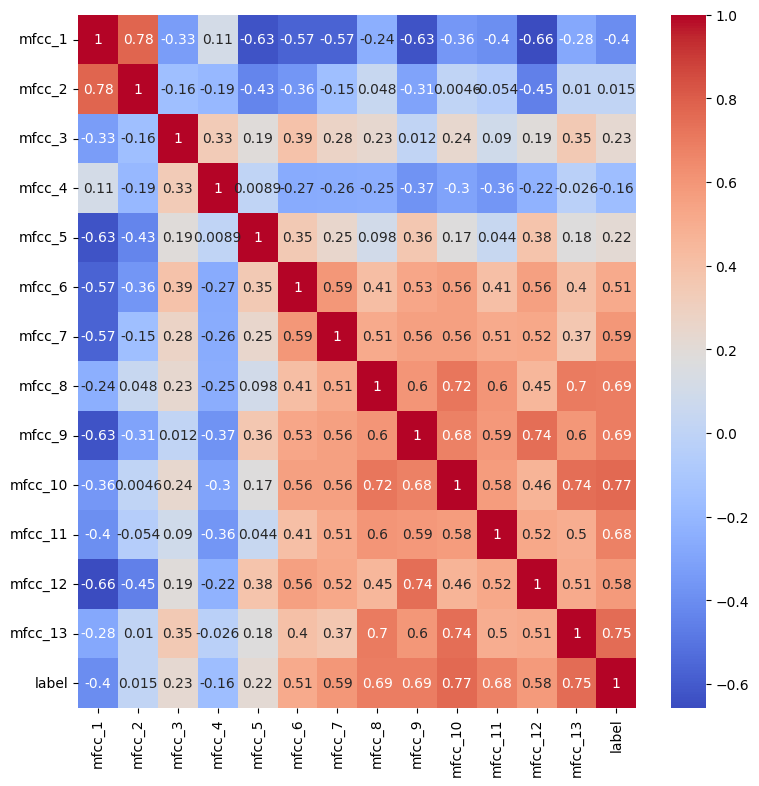

In [ ]:
plt.figure(figsize=(9, 9))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Training the model

Decision tree classifier is used for the classification

Due to data giving issues of overfitting the tree is pruned

In [ ]:
X = dataset.drop(['label'],axis=1)
y = dataset['label']

In [ ]:
model = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2,max_features='sqrt')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2)

# Evaluating the model

Accuracy --> 95.0%

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print(test_data_accuracy*100)

95.0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test,X_test_prediction)

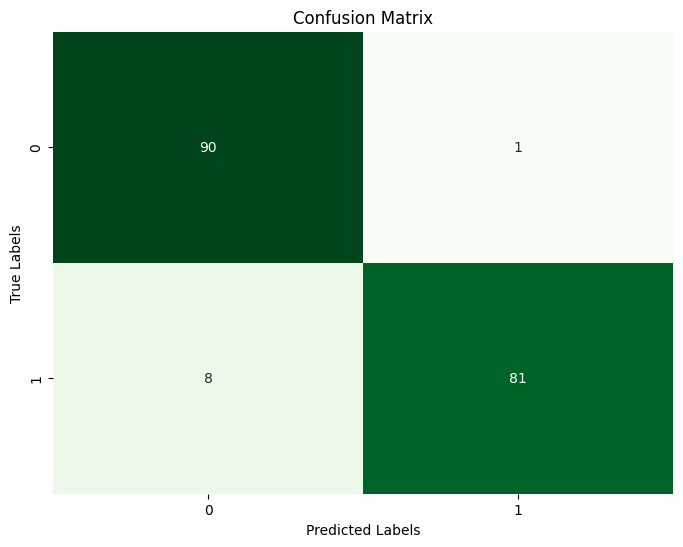

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Precision = TP/(TP+FP) = 0.988

Recall = TP/(TP+FN) = 0.943

Specificity = TN/(TN+FP) = 0.989
​




# Performing cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
num_folds = 5

In [ ]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96111111 0.96111111 0.98333333 0.95       0.95555556]
Mean Accuracy: 0.9622222222222222
Standard Deviation: 0.011331154474650617


# Hyperparameter tuning

using max_depth , min_samples_split, min_samples_leaf, max_features

These are all the parameters that are used for tree pruning we got the best values of these parameters through GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.976667
1   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.975556
2   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.942222
3   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.965556
4   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.955556
5   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.967778
6   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.957778
7   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.955556
8   {'max_depth': 3, 'max_features': 'sqrt', 'min_...         0.971111
9   {'max_depth': 3, 'max_features': 'log2', 'min_...         0.972222
10  {'max_depth': 3, 'max_features': 'log2', 'min_...         0.972222
11  {'max_depth': 3, 'max_features': 'log2', 'min_...         0.977778
12  {'max_depth': 3, 'max_features': 'log2', 'min_...         0.970000
13  {'

# Best values to prune the tree

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


# Designing a predictive model

In [ ]:
# [-315.803,209.8507,2025869,7.566138,-27.8369,-9.66877,-7.09282,29.51933,-10.3274,33.18811,2.007608,-32.1666,19.25741]
input_data = [-283.52698   ,   98.99438   ,   -3.029233  ,   -6.9686766 ,
         -2.1753619 ,  -35.71373   ,  -31.066952  ,  -14.886692  ,
         -1.1284362 ,  -11.66128   ,    1.869652  ,   -0.84416664,
         -1.6005697 ]
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction[0])
if(prediction[0] == 0):
    print('The person does not have parkinsons disease')
else:    print('The person has parkinsons disease')

0
The person does not have parkinsons disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
